In [1]:
from pyciss import pipeline

In [2]:
%matplotlib osx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['image.cmap'] = 'YlGnBu_r'

In [3]:
cd ~/data/ciss/opus

/Users/klay6683/data/ciss/opus


In [4]:
ls

N1512191062_1.IMG              N1595336558_1.map.cal.cub      N1654250545_1_med.jpg
N1512191062_1.LBL              N1595336558_1.map.cal.equ.cub  W1512190938_1.IMG
N1512191062_1_med.jpg          N1595336558_1_med.jpg          W1512190938_1.LBL
N1554730872_1.IMG              N1595336719_1.IMG              W1512190938_1_med.jpg
N1554730872_1.LBL              N1595336719_1.LBL              W1512191728_1.IMG
N1554730872_1_med.jpg          N1595336719_1.cal.cub          W1512191728_1.LBL
N1563636983_1.IMG              N1595336719_1.cub              W1512191728_1_med.jpg
N1563636983_1.LBL              N1595336719_1.map.cal.cub      W1563636833_1.IMG
N1563636983_1_med.jpg          N1595336719_1.map.cal.equ.cub  W1563636833_1.LBL
N1595328405_1.IMG              N1595336719_1_med.jpg          W1563636833_1_med.jpg
N1595328405_1.LBL              N1595336880_1.IMG              W1563857545_1.IMG
N1595328405_1_med.jpg          N1595336880_1.LBL              W1563857545_1.LBL
N1595328477_1.IMG       

In [5]:
to_mosaic = ['N1595337202_1', 'N1595337041_1','N1595336880_1',
             'N1595336719_1','N1595336558_1','N1595336397_1']
to_mosaic = [i+'.LBL' for i in to_mosaic]

In [6]:
import gdal
import numpy as np
ds = gdal.Open('N1595337202_1.map.cal.cub')

In [49]:
from pyciss.io import RingCube

In [50]:
cube = RingCube('N1595337202_1.map.cal.cub')

In [51]:
cube.data.shape

(1, 1373, 1523)

134665361.09351

In [11]:
img_array = cube.get_image_array()

In [12]:
img_array.max()

254

In [19]:
plt.imshow(cube.data[0], cmap=plt.cm.YlGnBu_r)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10d247f80>

In [31]:
data = cube.apply_numpy_specials()

In [33]:
plt.imshow(data[0])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10d32c320>

In [35]:
cube.label.

['Label', 'OriginalLabel', 'Table', 'IsisCube', 'NaifKeywords', 'History']

In [7]:
band = ds.GetRasterBand(1)

In [8]:
data = band.ReadAsArray()
data[data==band.GetNoDataValue()] = np.nan

In [9]:
data[np.isnan(data)].size

923983

In [10]:
data.size

2091079

In [11]:
data.shape

(1373, 1523)

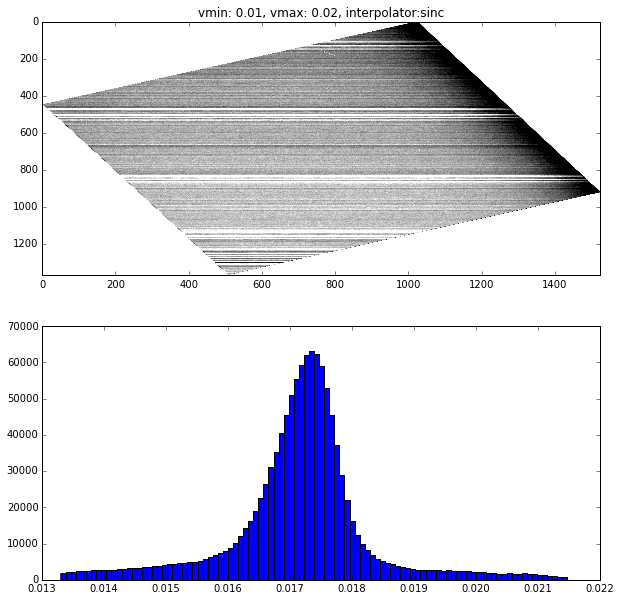

In [59]:
plotting.myinteract(data)

In [12]:
mean_value = np.nanmean(data, axis=1)

/Users/klay6683/miniconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [13]:
subtracted = data - mean_value[:, np.newaxis]

In [70]:
np.nanmin(subtracted)

-0.0063309232

In [14]:
plotting.imshowlowhigh(subtracted, 10, 90);

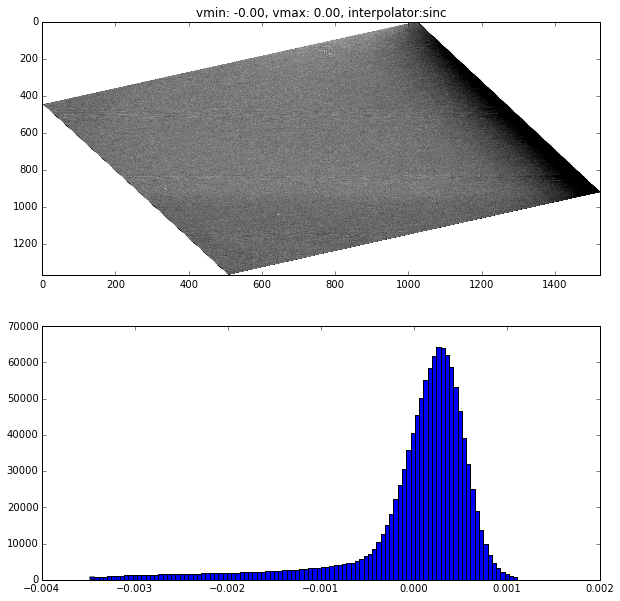

In [72]:
plotting.myinteract(subtracted)

In [42]:
cd ~/data/ciss/PDSdata-2015-02-20T14-24-33-08-00/

/Users/klay6683/data/ciss/PDSdata-2015-02-20T14-24-33-08-00


In [43]:
ls

N1512191062_1.IMG*                      N1595336241_1_CALIB.LBL*
N1512191062_1.LBL*                      N1595336241_1_thumb.jpg*
N1512191062_1_CALIB.IMG*                N1595944266_1.IMG*
N1512191062_1_CALIB.LBL*                N1595944266_1.LBL*
N1512191062_1_thumb.jpg*                N1595944266_1_CALIB.IMG*
N1563636983_1.IMG*                      N1595944266_1_CALIB.LBL*
N1563636983_1.LBL*                      N1595944266_1_thumb.jpg*
N1563636983_1_CALIB.IMG*                N1595944336_1.IMG*
N1563636983_1_CALIB.LBL*                N1595944336_1.LBL*
N1563636983_1_thumb.jpg*                N1595944336_1_CALIB.IMG*
N1595328621_1.IMG*                      N1595944336_1_CALIB.LBL*
N1595328621_1.LBL*                      N1595944336_1_thumb.jpg*
N1595328621_1_CALIB.IMG*                N1595944414_1.IMG*
N1595328621_1_CALIB.LBL*                N1595944414_1.LBL*
N1595328621_1_thumb.jpg*                N1595944414_1_CALIB.IMG*
N1595328693_1.IMG*                      N1595944414_1_CALIB.L

In [45]:
fnames = !ls *.LBL

In [47]:
fnames = [i for i in fnames if not 'CALIB' in i]

In [48]:
from pyciss.pipeline import pipeline

In [64]:
from IPython.parallel import Client
c = Client()

In [65]:
dview = c[:]
lview = c.load_balanced_view()

In [66]:
%%px
from pyciss.pipeline import pipeline

[stderr:0] :0: FutureWarning: IPython widgets are experimental and may change in the future.
[stderr:1] :0: FutureWarning: IPython widgets are experimental and may change in the future.
[stderr:2] :0: FutureWarning: IPython widgets are experimental and may change in the future.
[stderr:3] :0: FutureWarning: IPython widgets are experimental and may change in the future.


In [67]:
results = lview.map_async(pipeline, fnames)

In [68]:
results.get()

['Problem with N1512191062_1.LBL',
 'Problem with N1563636983_1.LBL',
 'Problem with N1595328621_1.LBL',
 'Problem with N1595328693_1.LBL',
 'Problem with N1595328765_1.LBL',
 'Problem with N1595328837_1.LBL',
 'Problem with N1595328909_1.LBL',
 'Problem with N1595328981_1.LBL',
 'Problem with N1595329053_1.LBL',
 'Problem with N1595329125_1.LBL',
 'Problem with N1595329197_1.LBL',
 'Problem with N1595336241_1.LBL',
 'Problem with N1595944266_1.LBL',
 'Problem with N1595944336_1.LBL',
 'Problem with N1595944414_1.LBL',
 'Problem with N1595944484_1.LBL',
 'Problem with N1595944554_1.LBL',
 'Problem with W1512190938_1.LBL',
 'Problem with W1563857545_1.LBL',
 'Problem with W1563857873_1.LBL',
 'Problem with W1563858060_1.LBL',
 'Problem with W1683902515_1.LBL']

In [69]:
from pyciss import pipeline

In [70]:
for fname in fnames:
    try:
        pipeline.calibrate_ciss(fname)
    except:
        print "Problem with {}".format(fname)
        pass